<a href="https://colab.research.google.com/github/Mohan1github/ML_projects/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/validation_score.csv")

In [3]:
df.head()

,Unnamed: 0,median7,median14,median21,median28,median35,median42,median49,median7_h,median14_h,median21_h,median28_h,median35_h,median42_h,median49_h,holiday,holiday_log,yearly_log
0,0,0.394786,0.398010,0.405826,0.405826,0.405826,0.405826,0.405826,0.489267,0.415286,0.405018,0.403895,0.405018,0.405018,0.403465,0.519470,0.424500,0.636273
1,1,0.415525,0.436615,0.484943,0.542946,0.484943,0.513212,0.503193,0.442488,0.432065,0.488515,0.539954,0.505501,0.507897,0.492611,0.748011,0.650149,0.409339
2,2,0.688429,0.500956,0.500956,0.492091,0.492091,0.492091,0.492091,0.531118,0.532642,0.500956,0.492091,0.497236,0.497236,0.497236,0.592786,0.527832,0.530204
3,3,0.356799,0.347737,0.356799,0.347737,0.356799,0.356799,0.356799,0.592931,0.340882,0.340882,0.340882,0.356799,0.356799,0.356799,0.486648,0.398567,0.346489
4,4,0.443860,0.453087,0.442593,0.489076,0.586340,0.586340,0.586340,0.475404,0.507502,0.485196,0.485196,0.573371,0.586340,0.586340,0.518994,0.496272,0.828707


In [21]:
print("Missing Values Per Column:\n", df.isnull().sum())
print("Checking for NaN or Inf values:", np.any(np.isnan(df.values)), np.any(np.isinf(df.values)))

Missing Values Per Column:
 Unnamed: 0     0
median7        0
median14       0
median21       1
median28       1
median35       1
median42       1
median49       1
median7_h      1
median14_h     1
median21_h     1
median28_h     1
median35_h     1
median42_h     1
median49_h     1
holiday        1
holiday_log    1
yearly_log     1
dtype: int64
Checking for NaN or Inf values: True False


In [22]:
df.fillna(df.mean(), inplace=True)

In [23]:
df.isnull().sum()

,0
Unnamed: 0,0
median7,0
median14,0
median21,0
median28,0
median35,0
median42,0
median49,0
median7_h,0
median14_h,0


Dataset Summary:
         Unnamed: 0      median7     median14     median21     median28  \
count  7351.000000  7351.000000  7351.000000  7351.000000  7351.000000   
mean   3675.000000     0.462766     0.450092     0.446059     0.444907   
std    2122.195247     0.238089     0.236388     0.237245     0.239024   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1837.500000     0.320380     0.316236     0.310389     0.308441   
50%    3675.000000     0.422373     0.409988     0.405667     0.403752   
75%    5512.500000     0.546462     0.522816     0.517668     0.517305   
max    7350.000000     2.000000     2.000000     2.000000     2.000000   

          median35     median42     median49    median7_h   median14_h  \
count  7351.000000  7351.000000  7351.000000  7351.000000  7351.000000   
mean      0.443460     0.445059     0.446640     0.480260     0.457796   
std       0.237928     0.241129     0.243108     0.245594     0.238189   
min       0.000000 

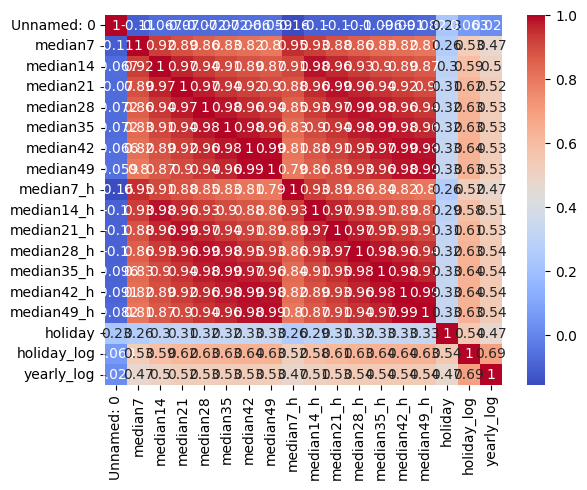

In [24]:
print("Dataset Summary:\n", df.describe())
print("Correlation Matrix:\n", df.corr())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

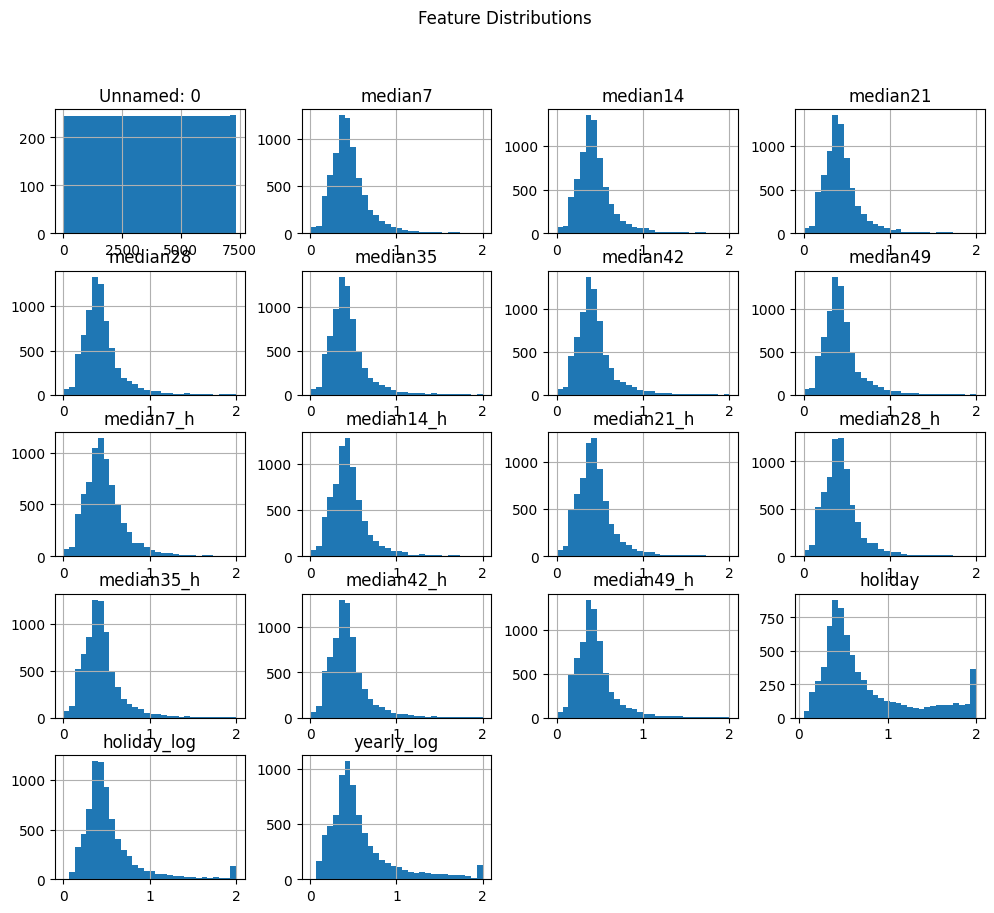

In [25]:
df.hist(figsize=(12,10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


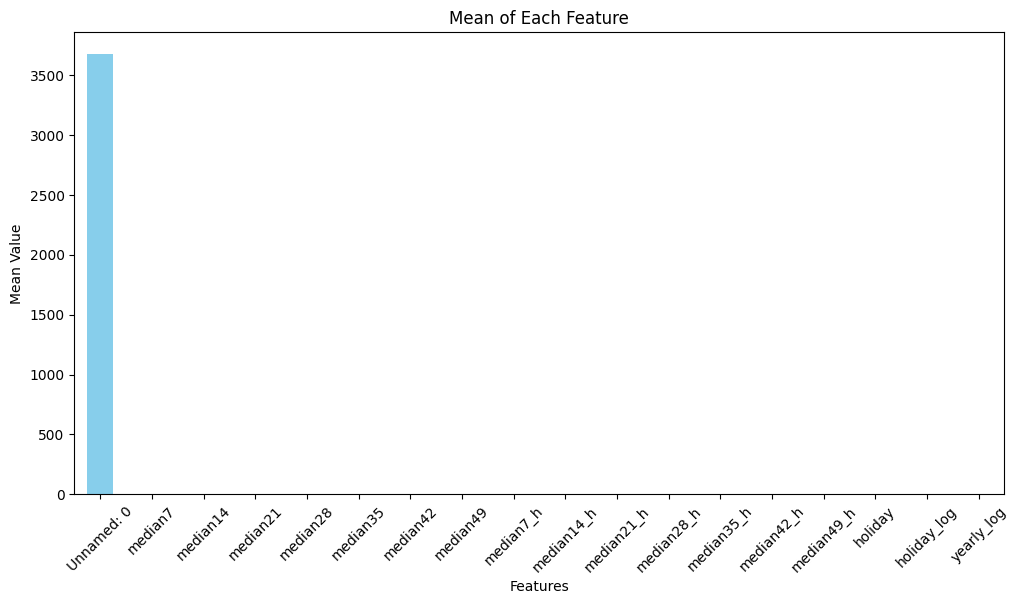

In [26]:
plt.figure(figsize=(12,6))
df.mean().plot(kind='bar', color='skyblue')
plt.title("Mean of Each Feature")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()


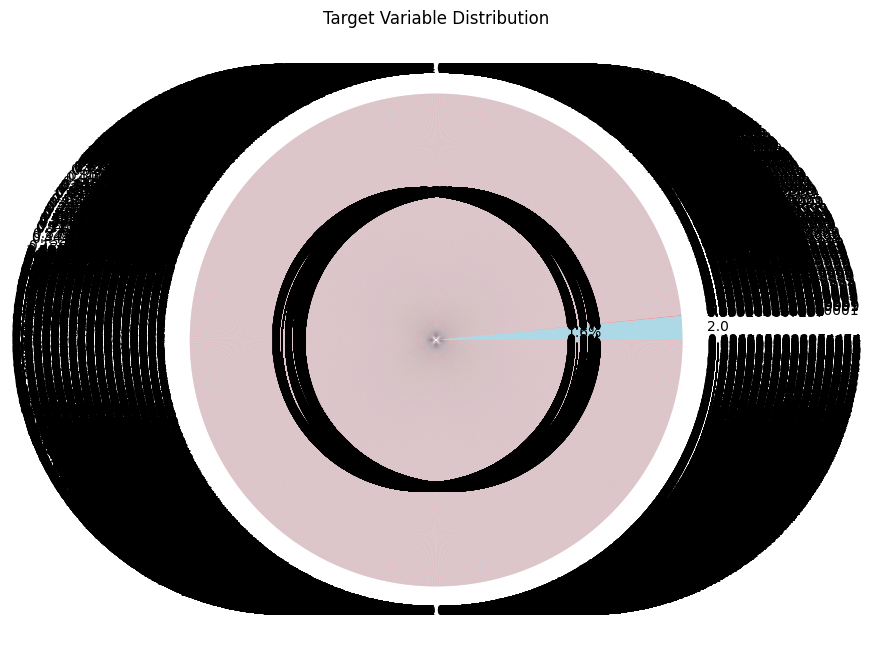

In [27]:
plt.figure(figsize=(8,8))
df.iloc[:,-1].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'lightcoral'])
plt.title("Target Variable Distribution")
plt.ylabel("")
plt.show()

In [28]:
data = df.values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [29]:
data_scaled

array([[0.00000000e+00, 1.97392912e-01, 1.99004931e-01, ...,
        2.39389072e-01, 2.12249897e-01, 3.18136740e-01],
       [1.36054422e-04, 2.07762720e-01, 2.18307352e-01, ...,
        3.56799940e-01, 3.25074522e-01, 2.04669525e-01],
       [2.72108844e-04, 3.44214281e-01, 2.50478180e-01, ...,
        2.77054503e-01, 2.63916062e-01, 2.65102135e-01],
       ...,
       [9.99727891e-01, 9.98731136e-02, 1.00017312e-01, ...,
        7.76465680e-02, 2.67809455e-01, 1.09605438e-01],
       [9.99863946e-01, 1.78294244e-01, 1.82141757e-01, ...,
        2.32883007e-01, 1.83547970e-01, 2.85639100e-01],
       [1.00000000e+00, 1.47508334e-01, 1.48986600e-01, ...,
        3.58319865e-01, 2.67757417e-01, 2.90106627e-01]])

In [30]:
X = data_scaled[:, :-1]
y = data_scaled[:, -1]

In [31]:
X

array([[0.00000000e+00, 1.97392912e-01, 1.99004931e-01, ...,
        2.01732468e-01, 2.39389072e-01, 2.12249897e-01],
       [1.36054422e-04, 2.07762720e-01, 2.18307352e-01, ...,
        2.46305446e-01, 3.56799940e-01, 3.25074522e-01],
       [2.72108844e-04, 3.44214281e-01, 2.50478180e-01, ...,
        2.48618005e-01, 2.77054503e-01, 2.63916062e-01],
       ...,
       [9.99727891e-01, 9.98731136e-02, 1.00017312e-01, ...,
        1.02237794e-01, 7.76465680e-02, 2.67809455e-01],
       [9.99863946e-01, 1.78294244e-01, 1.82141757e-01, ...,
        1.83529264e-01, 2.32883007e-01, 1.83547970e-01],
       [1.00000000e+00, 1.47508334e-01, 1.48986600e-01, ...,
        2.23310142e-01, 3.58319865e-01, 2.67757417e-01]])

In [32]:
y

array([0.31813674, 0.20466952, 0.26510214, ..., 0.10960544, 0.2856391 ,
       0.29010663])

In [34]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mse')

In [40]:
history = model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0159 - val_loss: 0.0152
Epoch 2/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0165 - val_loss: 0.0139
Epoch 3/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167 - val_loss: 0.0133
Epoch 4/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0168 - val_loss: 0.0136
Epoch 5/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0170 - val_loss: 0.0134
Epoch 6/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0161 - val_loss: 0.0144
Epoch 7/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0168 - val_loss: 0.0133
Epoch 8/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0157 - val_loss: 0.0133
Epoch 9/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0161 - val_loss: 0.0143
Epoch 10/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0170 - val_loss: 0.0133
Epoch 11/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0169 - val_loss: 0.0133
Epoch 12/80
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0119
Test Loss: 0.012731756083667278


In [42]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = 1 - (mae / np.mean(y_test))

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy Score: {accuracy * 100:.2f}%")


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Mean Absolute Error: 0.07043266828927285
Mean Squared Error: 0.01273175297257821
R^2 Score: 0.6263628730177064
Accuracy Score: 75.04%


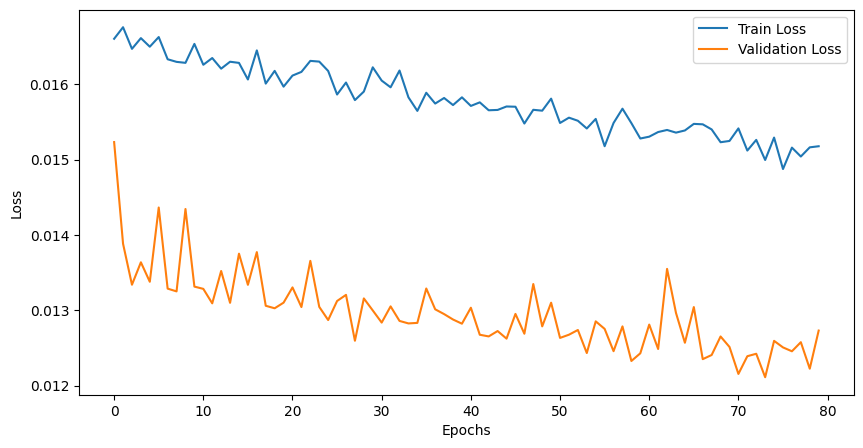

In [43]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

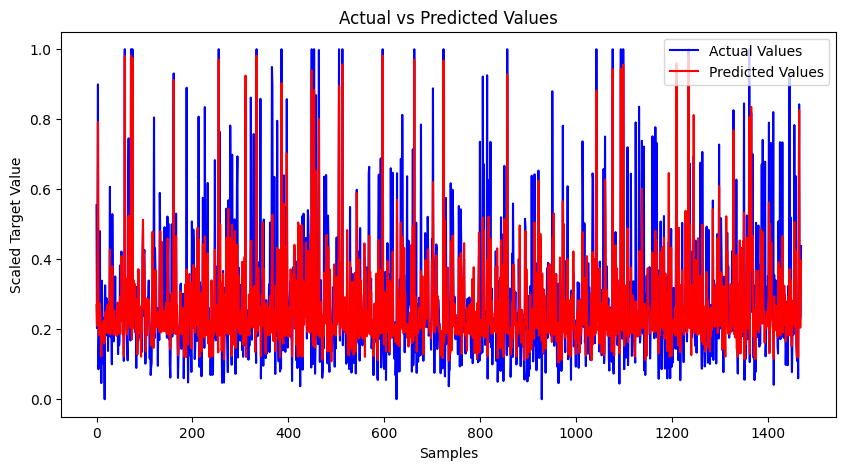

In [45]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual Values", color='blue')
plt.plot(y_pred, label="Predicted Values", color='red')
plt.xlabel("Samples")
plt.ylabel("Scaled Target Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


In [46]:
future_X = X_test[:10]
y_future_pred = model.predict(future_X)
print("Future Predictions:", y_future_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
Future Predictions: [[0.26879764]
 [0.21038839]
 [0.41868678]
 [0.79200435]
 [0.23816815]
 [0.18325584]
 [0.27544904]
 [0.24456441]
 [0.24928361]
 [0.20157012]]


In [49]:
X_test
y_test

array([0.55430397, 0.20314581, 0.39348777, ..., 0.22720276, 0.238152  ,
       0.43786327])

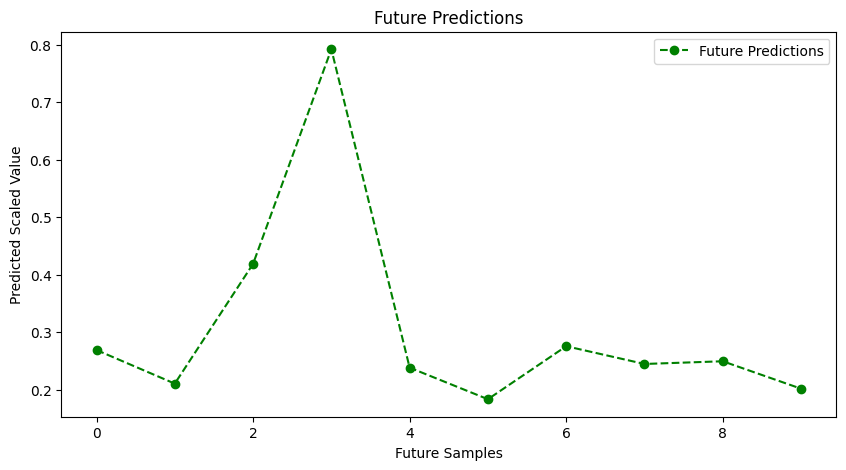

In [50]:
plt.figure(figsize=(10,5))
plt.plot(y_future_pred, marker='o', linestyle='dashed', color='green', label='Future Predictions')
plt.xlabel("Future Samples")
plt.ylabel("Predicted Scaled Value")
plt.title("Future Predictions")
plt.legend()
plt.show()


In [51]:
model.save("web_traffic_lstm_model.h5")